In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


['train.csv', 'gender_submission.csv', 'test.csv']


In [2]:
test_df=pd.read_csv('../input/test.csv')
train_df=pd.read_csv('../input/train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
display(train_df.drop(['Survived','Parch'],axis=1))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,237736,30.0708,NaN,C


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
total=train_df.isnull().sum().sort_values(ascending=False)
percent=train_df.isnull().sum()/train_df.isnull().count()*100
percent=round(percent,2).sort_values(ascending=False)
display(pd.concat([total,percent],axis=1,keys=['Total','Percent']))

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [9]:
display(total)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [10]:
display(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Male')

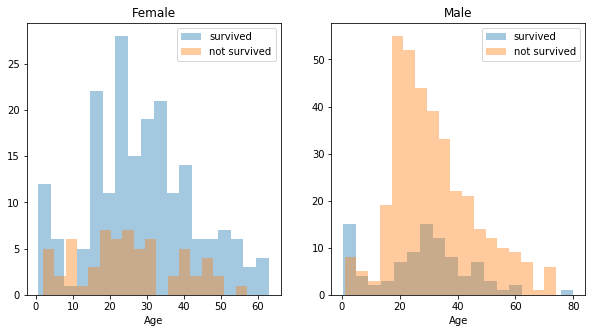

In [11]:
fig, axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
women=train_df[train_df['Sex']=='female']
men=train_df[train_df['Sex']=='male']
ax=sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18,label='survived',ax=axes[0],kde=False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(),bins=18,label='not survived',ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men[men['Survived']==1].Age.dropna(),bins=18,label='survived',ax=axes[1],kde=False)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(),bins=18,label='not survived',ax=axes[1],kde=False)
ax.legend()
ax.set_title('Male')

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


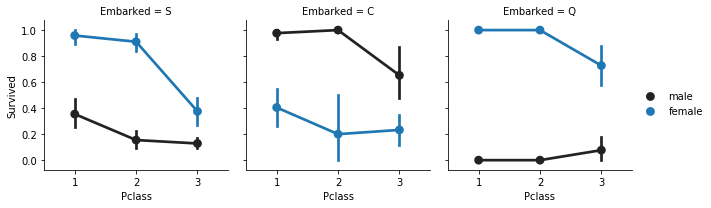

In [12]:
FacetGrid=sns.FacetGrid(train_df,col='Embarked')
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex')
FacetGrid.add_legend()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


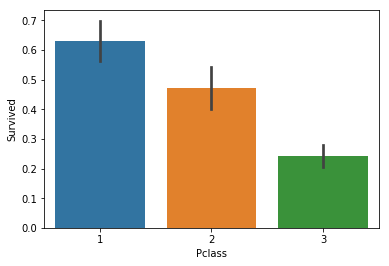

In [13]:
sns.barplot(x='Pclass',y='Survived',data=train_df)

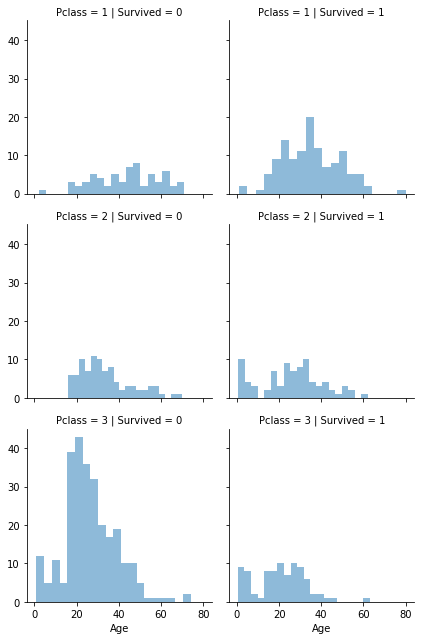

In [14]:
grid=sns.FacetGrid(train_df, col='Survived',row='Pclass')
grid.map(plt.hist,'Age',alpha=0.5,bins=20)

In [15]:
data=[train_df, test_df]
for dataset in data:
    dataset['relatives']=dataset['SibSp']+dataset['Parch']
    dataset.loc[dataset['relatives']>0,'not_alone']=1
    dataset.loc[dataset['relatives']==0,'not_alone']=0
    dataset['not_alone']=dataset['not_alone'].astype(int)

In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


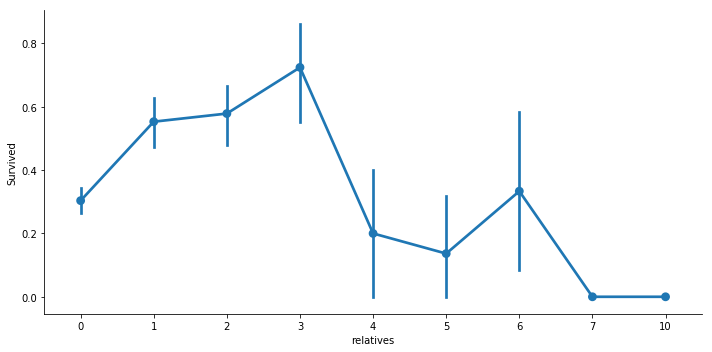

In [17]:
axes=sns.factorplot('relatives','Survived',data=train_df,aspect=2)

In [18]:
train_df=train_df.drop('PassengerId',axis=1)

In [19]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [20]:
train_df=train_df.drop(['Ticket','SibSp','Parch','Cabin'],axis=1)

In [21]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0,0


In [22]:
sex={"male":0,'female':1}
train_df['Sex']=train_df['Sex'].map(sex)


In [23]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,S,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,S,0,0


In [24]:
test_df['Sex']=test_df['Sex'].map(sex)

In [25]:
embarked={"C":0,"S":1,"Q":2}
data=[train_df,test_df]
for datasets in data:
    datasets['Embarked']=datasets['Embarked'].map(embarked)

In [26]:
train_df['Age']=train_df['Age'].fillna(train_df['Age'].median())

In [27]:
train_df['Age'].isna().sum()

0

In [28]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,1.0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,0.0,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,1.0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,1.0,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,1.0,0,0


In [29]:
train_df['Embarked']=train_df['Embarked'].fillna(train_df['Embarked'].median())

In [30]:
train_df['Sex'].isna().sum()

0

In [31]:
train_df['Pclass'].isna().sum()

0

In [32]:
train_df=train_df.drop('Name',axis=1)

In [33]:
test_df=test_df.drop('Name',axis=1)

In [34]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,892,3,0,34.5,0,0,330911,7.8292,NaN,2,0,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,1,1,1
2,894,2,0,62.0,0,0,240276,9.6875,NaN,2,0,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,1,0,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,1,2,1


In [35]:
test_df=test_df.drop(['Ticket','SibSp','Parch','Cabin'],axis=1)

In [36]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,relatives,not_alone
0,892,3,0,34.5,7.8292,2,0,0
1,893,3,1,47.0,7.0000,1,1,1
2,894,2,0,62.0,9.6875,2,0,0
3,895,3,0,27.0,8.6625,1,0,0
4,896,3,1,22.0,12.2875,1,2,1


In [37]:
test_df['Embarked']=test_df['Embarked'].fillna(train_df['Embarked'].median())

In [38]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,relatives,not_alone
0,0,3,0,22.0,7.2500,1.0,1,1
1,1,1,1,38.0,71.2833,0.0,1,1
2,1,3,1,26.0,7.9250,1.0,0,0
3,1,1,1,35.0,53.1000,1.0,1,1
4,0,3,0,35.0,8.0500,1.0,0,0


In [39]:
for datasets in data:
    datasets['Embarked']=datasets['Embarked'].astype(int)

In [40]:
train_df['Embarked'].isna().sum()

0

In [41]:
train_df['Embarked']=train_df['Embarked'].astype(int)

In [42]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,relatives,not_alone
0,0,3,0,22.0,7.2500,1,1,1
1,1,1,1,38.0,71.2833,0,1,1
2,1,3,1,26.0,7.9250,1,0,0
3,1,1,1,35.0,53.1000,1,1,1
4,0,3,0,35.0,8.0500,1,0,0


In [43]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,relatives,not_alone
0,892,3,0,34.5,7.8292,2,0,0
1,893,3,1,47.0,7.0000,1,1,1
2,894,2,0,62.0,9.6875,2,0,0
3,895,3,0,27.0,8.6625,1,0,0
4,896,3,1,22.0,12.2875,1,2,1


In [44]:
def feature_normalize(x):
    x=(x-np.mean(x))/np.std(x)
    return x

In [45]:
train_df['Age']=feature_normalize(train_df['Age'])

In [46]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,relatives,not_alone
0,0,3,0,-0.565736,7.2500,1,1,1
1,1,1,1,0.663861,71.2833,0,1,1
2,1,3,1,-0.258337,7.9250,1,0,0
3,1,1,1,0.433312,53.1000,1,1,1
4,0,3,0,0.433312,8.0500,1,0,0


In [47]:
train_df['Fare']=feature_normalize(train_df['Fare'])

In [48]:
test_df['Age']=feature_normalize(train_df['Age'])
test_df['Fare']=feature_normalize(train_df['Fare'])
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,relatives,not_alone
0,892,3,0,-0.565736,-0.502445,2,0,0
1,893,3,1,0.663861,0.786845,1,1,1
2,894,2,0,-0.258337,-0.488854,2,0,0
3,895,3,0,0.433312,0.420730,1,0,0
4,896,3,1,0.433312,-0.486337,1,2,1


In [49]:
x_train=train_df.drop('Survived',axis=1)
y_train=train_df['Survived']
x_test=test_df.drop('PassengerId',axis=1)

In [50]:
random_forest=RandomForestClassifier(50,max_depth=7)
random_forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
random_forest.score(x_train,y_train)

0.8967452300785634

In [52]:
y_pred=random_forest.predict(x_test)

In [53]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('submission.csv', index=False)